In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Boston dataset from Sklearn

In [2]:
column_names = [
    "longitude", "latitude", "housing_median_age", "total_rooms", 
    "total_bedrooms", "population", "households", 
    "median_income", "median_house_value"
]

file_path = r'D:\git_projects\Boston_pricing\end-to-end-ml-boston-pricing\housing.csv'

calfornia = pd.read_csv(file_path, usecols=column_names)


# Rearrange columns in the desired order
desired_order = [
    'median_income', 
    'housing_median_age', 
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'latitude', 
    'longitude',
    'median_house_value'
]

# Rearrange the DataFrame
calfornia = calfornia[desired_order]
calfornia

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,452600.0
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,358500.0
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,352100.0
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,341300.0
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09,78100.0
20636,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21,77100.0
20637,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22,92300.0
20638,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32,84700.0


In [3]:
calfornia.keys()

Index(['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'latitude', 'longitude',
       'median_house_value'],
      dtype='object')

## Data Overview

In [4]:

df= calfornia
df

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,452600.0
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,358500.0
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,352100.0
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,341300.0
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09,78100.0
20636,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21,77100.0
20637,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22,92300.0
20638,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32,84700.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   housing_median_age  20640 non-null  float64
 2   total_rooms         20640 non-null  float64
 3   total_bedrooms      20433 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   latitude            20640 non-null  float64
 7   longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,2635.763081,537.870553,1425.476744,499.539680,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2181.615252,421.385070,1132.462122,382.329753,2.135952,2.003532,115395.615874
min,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,1447.750000,296.000000,787.000000,280.000000,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,500001.000000


In [7]:
# Check for missing values
df.isnull().sum()


median_income           0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
latitude                0
longitude               0
median_house_value      0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

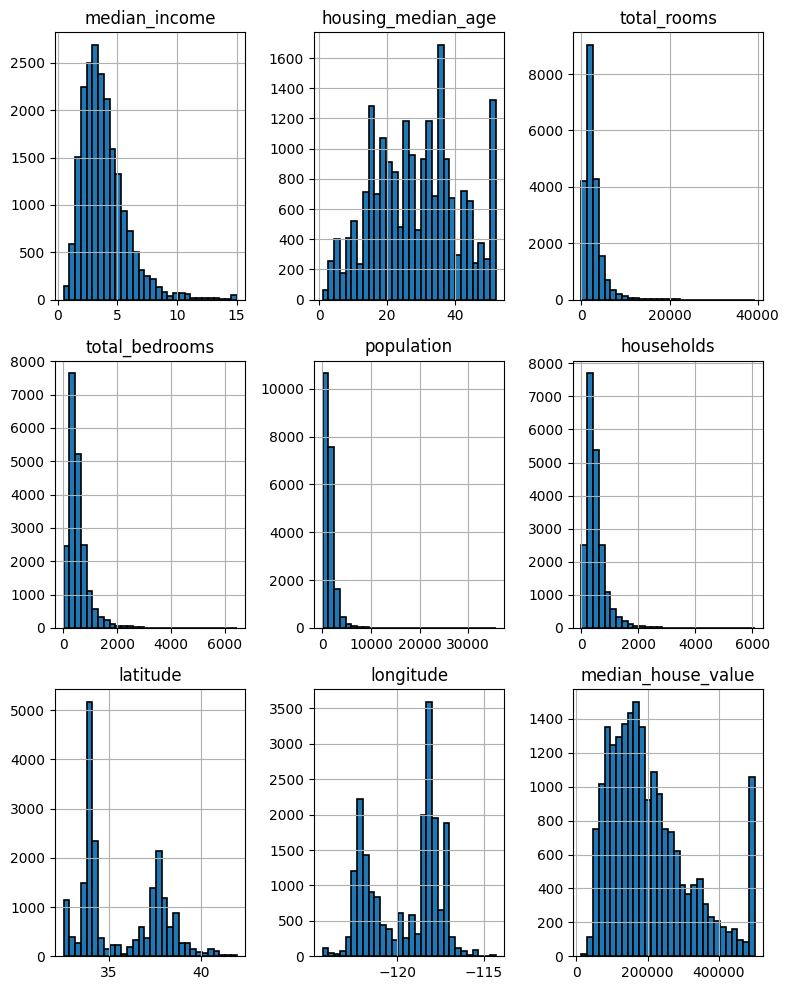

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms for each feature
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(8, 10))
plt.tight_layout()
plt.show()


In [9]:
## correlations
df.corr()

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
median_income,1.000000,-0.119034,0.198050,-0.007723,0.004834,0.013033,-0.079809,-0.015176,0.688075
housing_median_age,-0.119034,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,0.011173,-0.108197,0.105623
total_rooms,0.198050,-0.361262,1.000000,0.930380,0.857126,0.918484,-0.036100,0.044568,0.134153
total_bedrooms,-0.007723,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.066983,0.069608,0.049686
population,0.004834,-0.296244,0.857126,0.877747,1.000000,0.907222,-0.108785,0.099773,-0.024650
households,0.013033,-0.302916,0.918484,0.979728,0.907222,1.000000,-0.071035,0.055310,0.065843
latitude,-0.079809,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,1.000000,-0.924664,-0.144160
longitude,-0.015176,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.924664,1.000000,-0.045967
median_house_value,0.688075,0.105623,0.134153,0.049686,-0.024650,0.065843,-0.144160,-0.045967,1.000000


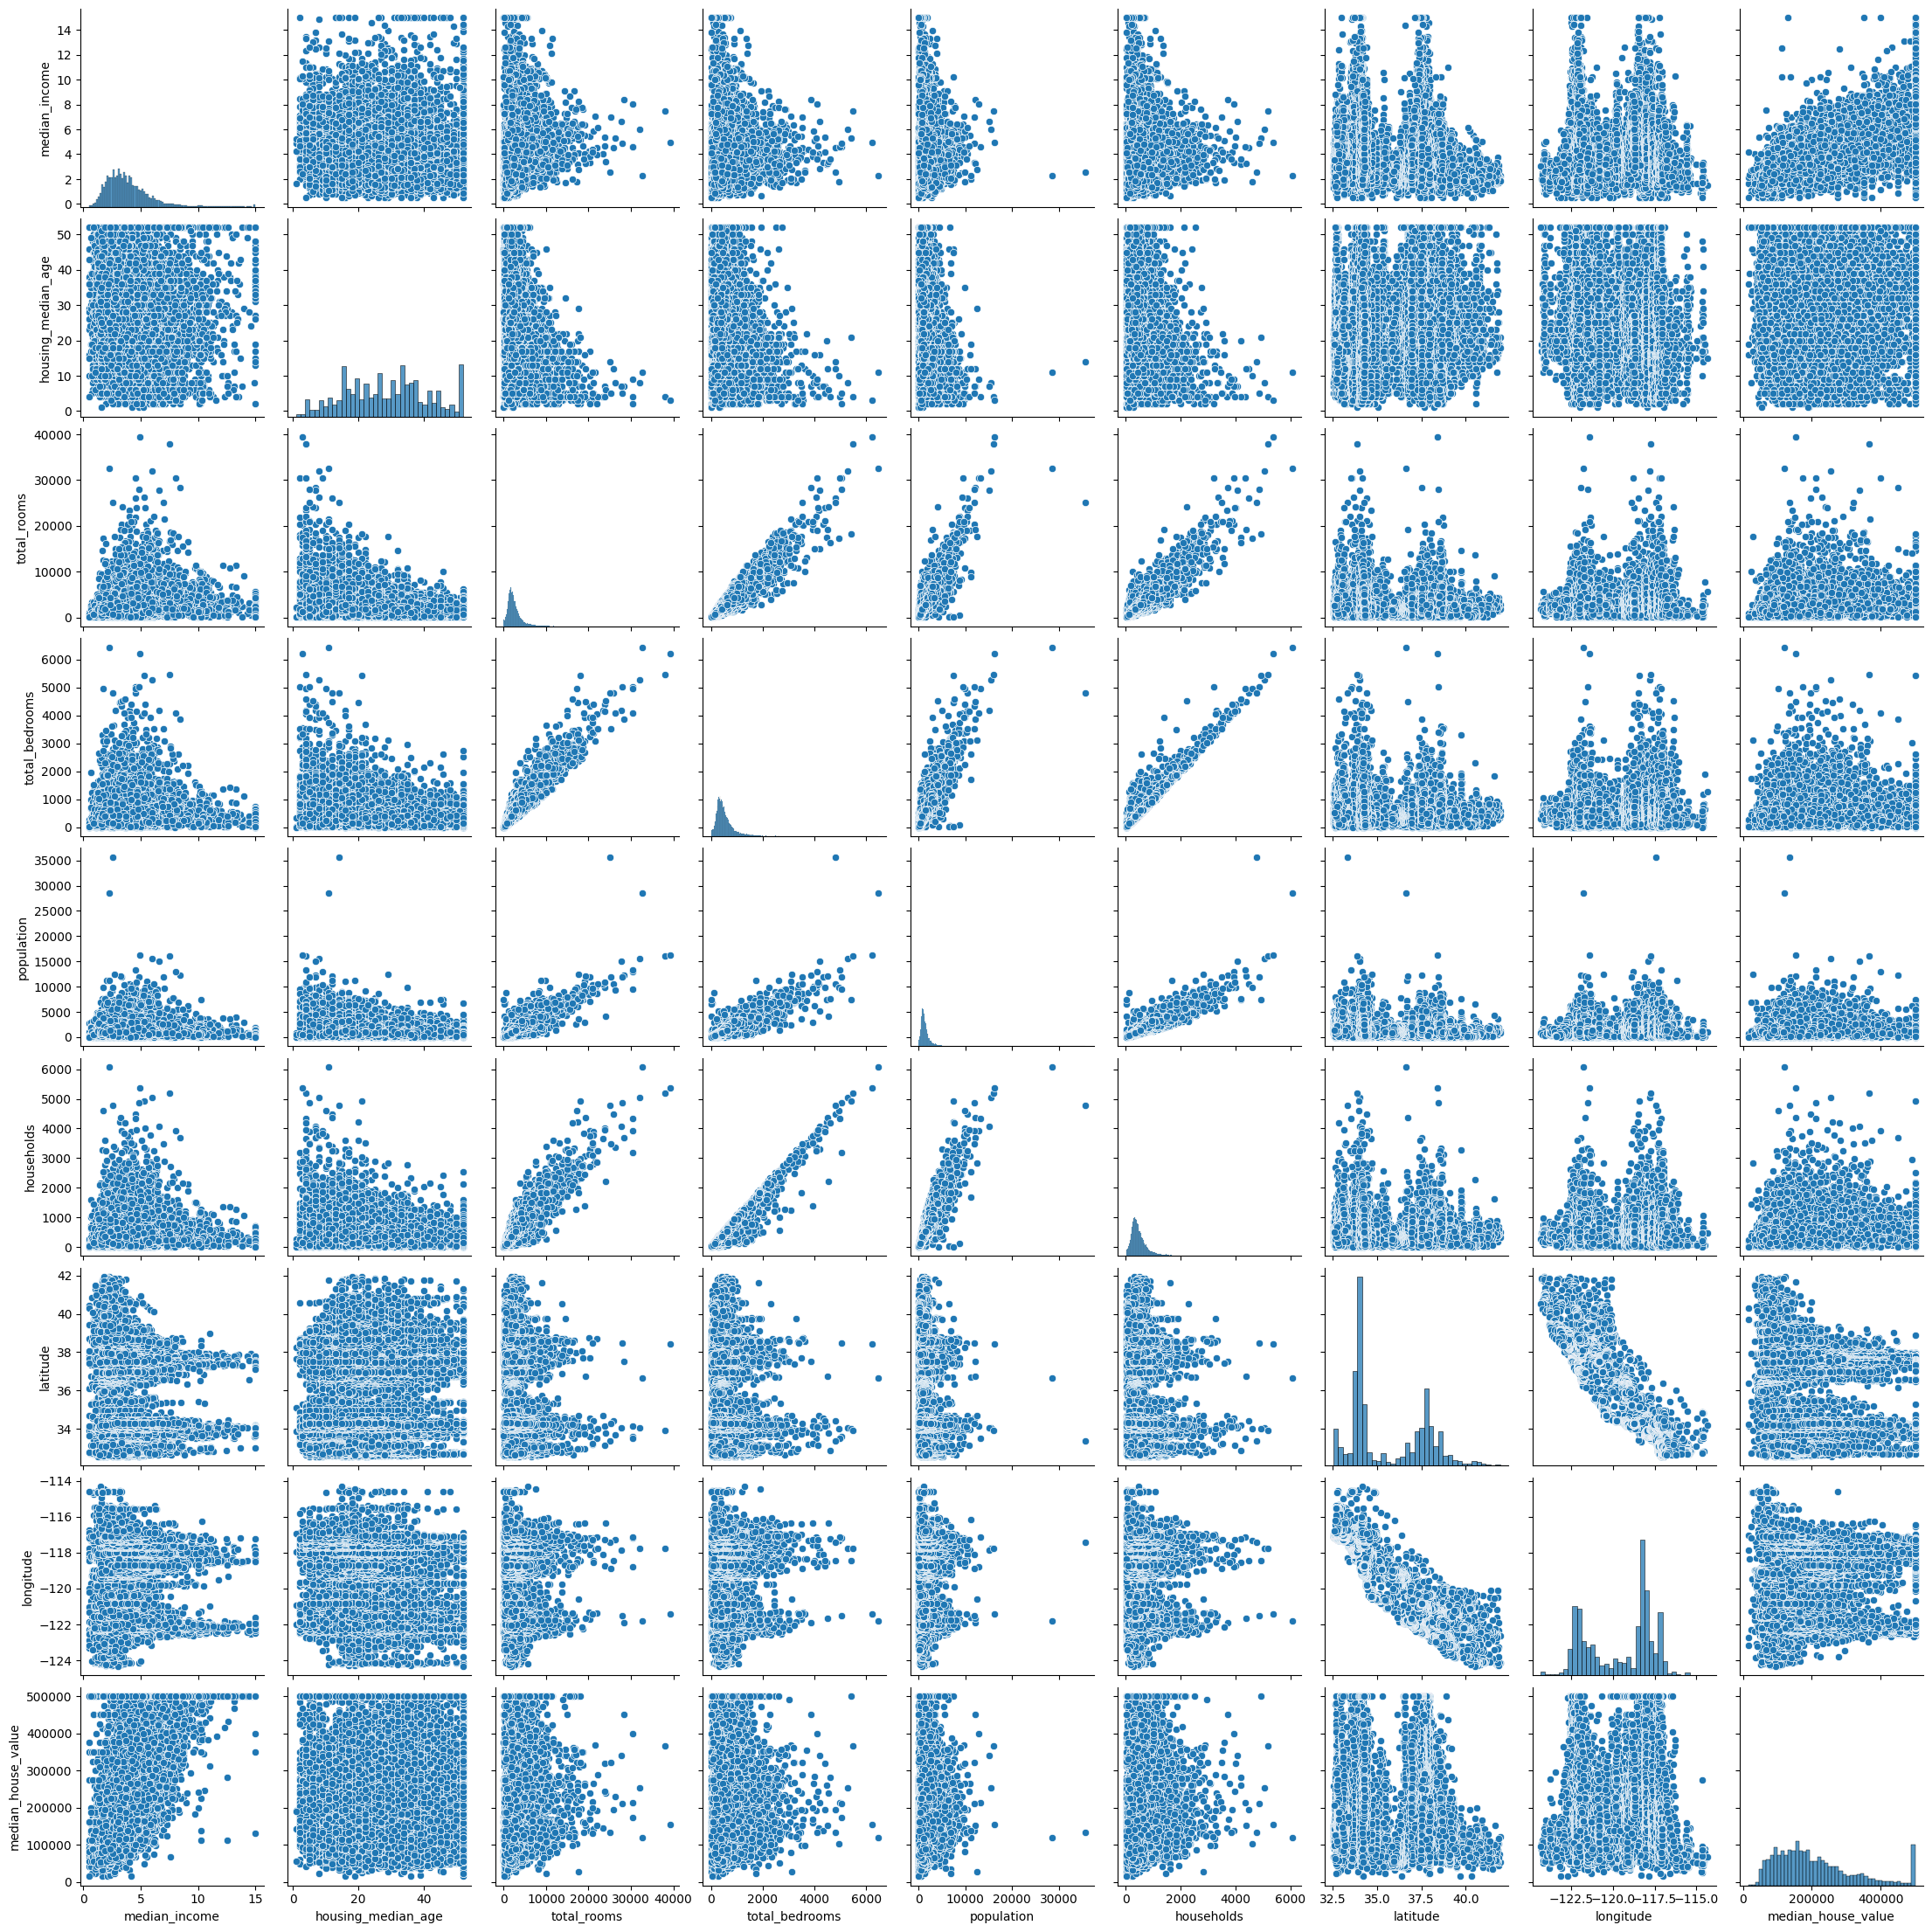

In [10]:
# Scatter plot: Median Income vs. Median House Value
sns.pairplot(df)


Text(0, 0.5, 'Med House Value')

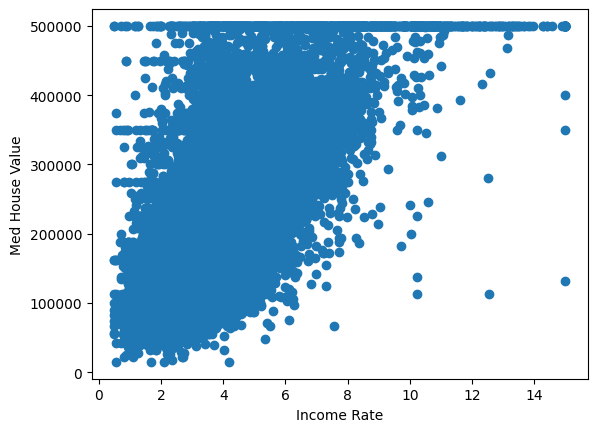

In [11]:
plt.scatter(df['median_income'],df['median_house_value'])
plt.xlabel("Income Rate")
plt.ylabel("Med House Value")

<Axes: xlabel='median_income', ylabel='median_house_value'>

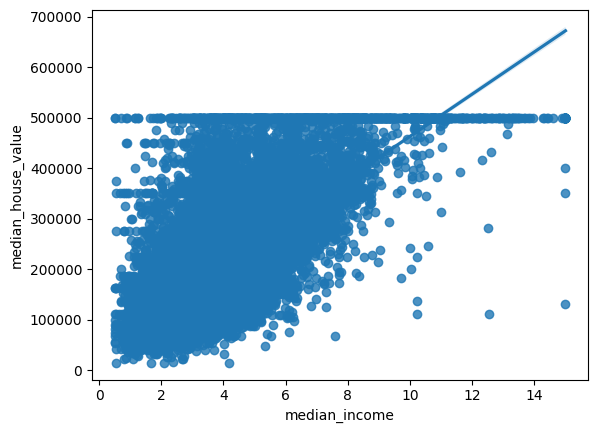

In [12]:
sns.regplot(x="median_income",y="median_house_value",data=df)

Text(0, 0.5, 'Med House Value')

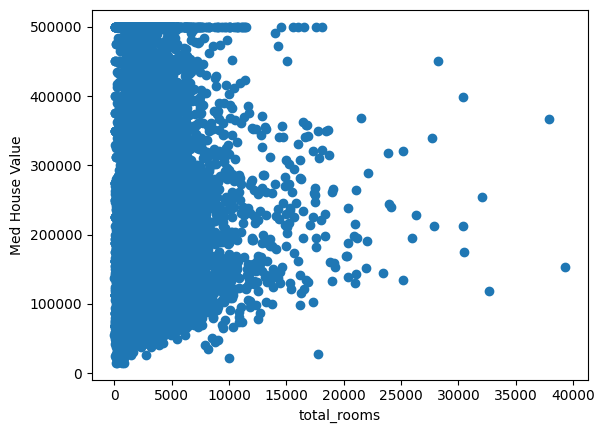

In [13]:
plt.scatter(df['total_rooms'],df['median_house_value'])
plt.xlabel("total_rooms")
plt.ylabel("Med House Value")

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

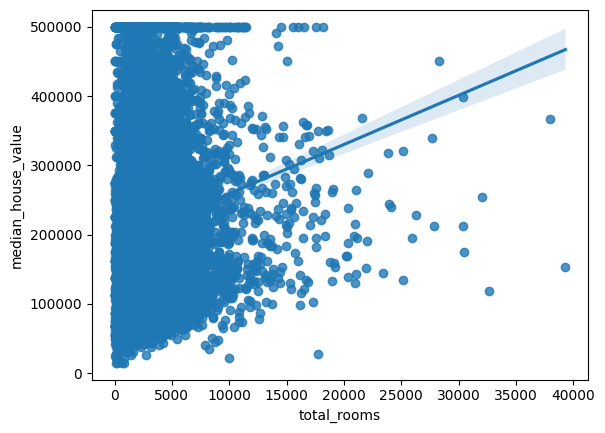

In [14]:
sns.regplot(x="total_rooms",y="median_house_value",data=df)

Text(0, 0.5, 'Med House Value')

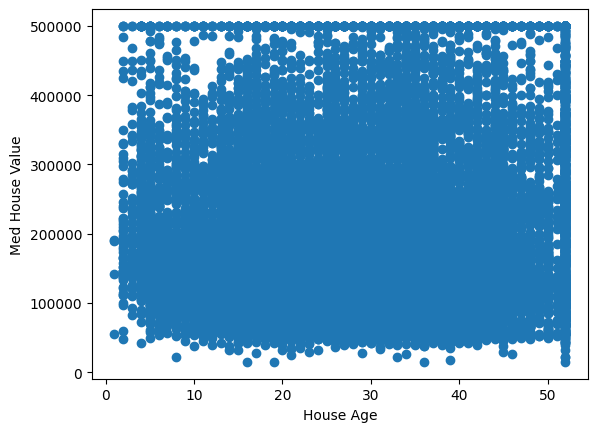

In [15]:
plt.scatter(df['housing_median_age'],df['median_house_value'])
plt.xlabel("House Age")
plt.ylabel("Med House Value")

## Preparing The Dataset

In [16]:

df.head()

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,452600.0
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,358500.0
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,352100.0
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,341300.0
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,342200.0


In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
X.head()


,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


In [19]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [20]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
X_train

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
7061,4.1312,35.0,2400.0,398.0,1218.0,408.0,33.93,-118.02
14689,2.8631,20.0,2183.0,534.0,999.0,496.0,32.79,-117.09
17323,4.2026,24.0,1601.0,282.0,731.0,285.0,34.59,-120.14
10056,3.1094,14.0,810.0,151.0,302.0,138.0,39.26,-121.00
15750,3.3068,52.0,3188.0,708.0,1526.0,664.0,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,1330.0,201.0,658.0,217.0,33.78,-117.96
11964,3.0500,33.0,3084.0,570.0,1753.0,449.0,34.02,-117.43
5390,2.9344,36.0,2101.0,569.0,1756.0,527.0,34.03,-118.38
860,5.7192,15.0,3575.0,597.0,1777.0,559.0,37.58,-121.96


In [22]:

X_test

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
20046,1.6812,25.0,1505.0,NaN,1392.0,359.0,36.06,-119.01
3024,2.5313,30.0,2943.0,NaN,1565.0,584.0,35.14,-119.46
15663,3.4801,52.0,3830.0,NaN,1310.0,963.0,37.80,-122.44
20484,5.7376,17.0,3051.0,NaN,1705.0,495.0,34.28,-118.72
9814,3.7250,34.0,2351.0,NaN,1063.0,428.0,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,1007.0,245.0,581.0,240.0,37.36,-121.90
13512,1.4891,41.0,1229.0,302.0,994.0,270.0,34.11,-117.32
10842,3.5120,16.0,7961.0,2276.0,5014.0,2116.0,33.67,-117.91
16559,3.6500,10.0,9205.0,1774.0,5935.0,1673.0,37.82,-121.28


In [23]:
## Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle

# Create a custom pipeline with imputer and scaler
transformation_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale the features
])

# Fit the pipeline on the training data
transformation_pipeline.fit(X_train)

# Transform both the training and test data
X_train= transformation_pipeline.transform(X_train)
X_test= transformation_pipeline.transform(X_test)

# Save the entire pipeline as a single .pkl file
with open('transformation_pipeline.pkl', 'wb') as file:
    pickle.dump(transformation_pipeline, file)

In [24]:
X_train

array([[ 0.13350629,  0.50935748, -0.11324158, ..., -0.24350772,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.21356615, ..., -0.01326659,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497, -0.48263943, ..., -0.56532203,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.25147682, ...,  0.06784108,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.42999055, ...,  0.15156512,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216,  0.73096426, ...,  1.93855026,
         0.99235014, -1.41592345]])

## Model Training

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Linear Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr):.4f}")


Linear Regression:
R2 Score: 0.6303
Mean Squared Error: 4852064371.1442
Mean Absolute Error: 51067.0460


In [26]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Regressor:")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt):.4f}")


Decision Tree Regressor:
R2 Score: 0.6175
Mean Squared Error: 5020437776.9808
Mean Absolute Error: 45166.8871


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Regressor:")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.4f}")


Random Forest Regressor:
R2 Score: 0.8109
Mean Squared Error: 2481440628.2030
Mean Absolute Error: 32538.0846


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("Gradient Boosting Regressor:")
print(f"R2 Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb):.4f}")


Gradient Boosting Regressor:
R2 Score: 0.7667
Mean Squared Error: 3061664414.5437
Mean Absolute Error: 38239.3598


## Compare Model Performance

In [29]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_gb)
    ],
    'Mean Absolute Error': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score  Mean Squared Error  Mean Absolute Error
0  Linear Regression  0.630330        4.852064e+09         51067.046000
1      Decision Tree  0.617502        5.020438e+09         45166.887112
2      Random Forest  0.810944        2.481441e+09         32538.084578
3  Gradient Boosting  0.766737        3.061664e+09         38239.359834


## Visualize the Comparison

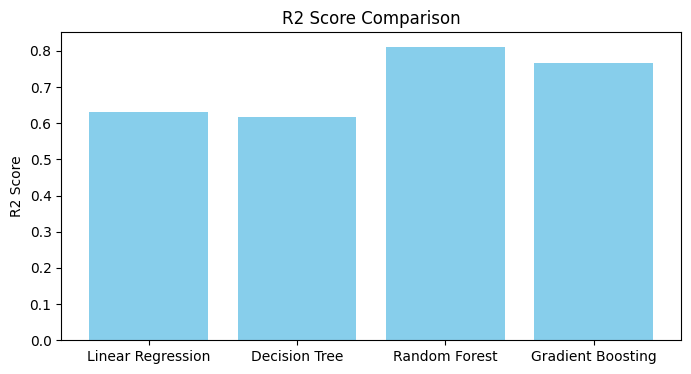

In [30]:
import matplotlib.pyplot as plt

# Bar plot for R2 Score
plt.figure(figsize=(8, 4))
plt.bar(results_df['Model'], results_df['R2 Score'], color='skyblue')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()


### Result Analysis
The results clearly show that Random Forest outperforms the other models, delivering the highest accuracy (R² score) and the lowest error rates. This makes it particularly effective at capturing the complex, non-linear patterns in the data. Gradient Boosting is a strong runner-up, and with some fine-tuning, it has the potential to match or even surpass Random Forest. On the other hand, Linear Regression and Decision Tree struggled to perform well, as they are less capable of handling the intricate relationships in the dataset. Overall, Random Forest stands out as the most reliable and accurate model for making predictions in this case.

## Predicting New Data with Random Forest

In [31]:
calfornia.iloc[0, :-1]

median_income           8.3252
housing_median_age     41.0000
total_rooms           880.0000
total_bedrooms        129.0000
population            322.0000
households            126.0000
latitude               37.8800
longitude            -122.2300
Name: 0, dtype: float64

In [32]:
calfornia.iloc[0, :-1].values.reshape(1, -1)

array([[   8.3252,   41.    ,  880.    ,  129.    ,  322.    ,  126.    ,
          37.88  , -122.23  ]])

In [33]:

new_data = calfornia.iloc[0, :-1].values.reshape(1, -1)
scaled_data = transformation_pipeline.transform(new_data) 
rf_model.predict(scaled_data)  


d:\git_projects\end-to-end-ml-california-pricing\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([438851.38])

## Pickling the Random Forest Model for Deployment

In [34]:
import pickle

# Save the Random Forest model to a file
pickle.dump(rf_model, open('rfmodel.pkl', 'wb'))

# Load the pickled model
pickled_rf_model = pickle.load(open('rfmodel.pkl', 'rb'))


In [36]:
## Prediction
pickled_rf_model.predict(transformation_pipeline.transform(calfornia.iloc[0, :-1].values.reshape(1, -1)))

d:\git_projects\end-to-end-ml-california-pricing\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([438851.38])